# Práctica 02. Demodulación AM

Equipo.

Cruz Morales Abigail



## Problema 1

In [ ]:
#Importamos las bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sps
import scipy.io as sio
import numpy.polynomial as npp
from scipy.signal import lsim
import IPython.display as ipd
import pandas as pd #Leer archivos de excel

In [ ]:
pip install scipy

In [ ]:
#Asignamos la variable
Variable = sio.loadmat('am.mat')

In [ ]:
#Recuperamos la información de am.mat
sio.loadmat('am.mat')

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Fri Apr 30 09:06:42 2021',
 '__version__': '1.0',
 '__globals__': [],
 'x': array([[ 9.99967103e-01,  6.12303256e-17, -9.99967103e-01, ...,
          1.00388867e+00,  1.35801723e-10, -1.00388867e+00]]),
 'fs': array([[400000.]])}

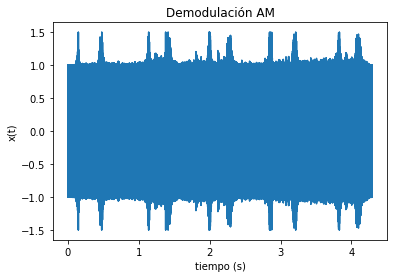

In [ ]:
#Cargamos el archivo y lo guardamos como una varibale para graficarlo
# fs y x están dentro de dos corchetes, asignamos un [0] para reconocer los datos
Variable['fs'][0]
Variable['x'][0]
#Creamos vector de tiempo
l = len(Variable['x'][0])
t = np.arange(0, l)*(1/Variable['fs'][0])
plt.plot(t, Variable['x'][0])
plt.xlabel ('tiempo (s)')
plt.ylabel ('x(t)')
plt.title ('Demodulación AM');

In [ ]:
#Calculamos la Transformada de Fourier de 'x'
tf = np.fft.fft(Variable['x'][0])
#Obtenemos una nueva longitud para la TF
l2 = len(tf)
#Comprovamos que se conserve el valor de 'fs'
print (Variable['fs'][0])

[400000.]


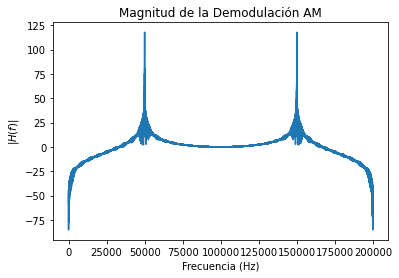

In [ ]:
#Creamos y graficamos nuestro vector de frecuencia
vf = np.arange(0, l2)*((400000/2)/l2)
plt.plot(vf, 20*np.log10(np.abs(tf)))
plt.xlabel ('Frecuencia (Hz)')
plt.ylabel ('$|H(f)|$')
plt.title ('Magnitud de la Demodulación AM');

## Problema 2

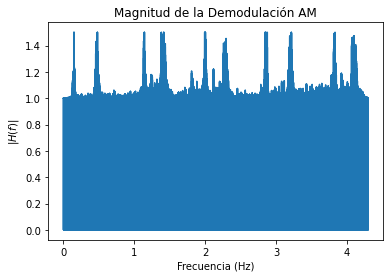

In [ ]:
#Implementamos la rectificación de media onda y graficamos
am_rectificada = Variable['x'][0]*(Variable['x'][0] >= 0)
plt.plot(t, am_rectificada)
plt.xlabel ('Frecuencia (Hz)')
plt.ylabel ('$|H(f)|$')
plt.title ('Magnitud de la Demodulación AM');

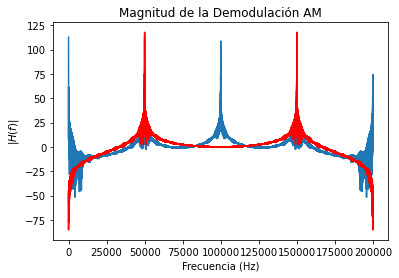

In [ ]:
#Obtenemos la Transformada de Fourier y graficamos el nuevo espectro en frecuencia
tf2 = np.fft.fft(am_rectificada)
plt.plot(vf, 20*np.log10(np.abs(tf2)))
plt.plot(vf, 20*np.log10(np.abs(tf)), color = 'red')
plt.xlabel ('Frecuencia (Hz)')
plt.ylabel ('$|H(f)|$')
plt.title ('Magnitud de la Demodulación AM');

## Problema 3



### Chebyshev:

#### $$A_P = 0.3 dB$$

#### $$A_R = 30 dB$$

#### $$f_P = 20 kHz$$

#### $$f_R = 50 kHz$$

#### $N = \left\lceil{\frac{\cosh^{-1}\sqrt{\frac{10^{\tiny A_R/10}-1}{10^{\tiny A_P/10} -1}}}{\cosh^{-1}\frac{\Omega_R}{\Omega_P}}} \right\rceil = 4$

#### $\epsilon = \sqrt{10^{A_P/10}-1} = 0.2674$

#### $\Omega_C = \begin{cases} \Omega_P \cosh \left( \frac{\cosh^{-1} \left( \frac{1}{\sqrt{10^{\tiny A_P/10} -1}} \right)}{N} \right) & A_P < 3 dB \\\Omega_P \cos \left( \frac{\cos^{-1} \left( \frac{1}{\sqrt{10^{\tiny A_P/10} -1}} \right)}{N} \right) & A_P > 3 dB\end{cases}$

#### $\Omega_c = 22536.03$

In [ ]:
#Paso1
# Especificación relativa
Ap, Ar, fp, fr = 0.3, 30, 20e3, 50e3

In [ ]:
# Parámetros Chebyshev
e = np.sqrt(10**(Ap/10)-1)
NT = np.ceil(np.arccosh(np.sqrt((10**(Ar/10)-1)/(10**(Ap/10)-1)))/np.arccosh(fr/fp)).astype('int')
if Ap <= 3:
    fcT = fp*np.cosh(np.arccosh(1/np.sqrt(10**(Ap/10)-1))/NT)
else:
    fcT = fp*np.cos(np.arccos(1/np.sqrt(10**(Ap/10)-1))/NT)
# Muestra resultados
print(f'Chebyshev: \t N ={NT:3d} \t fc = {fcT:6.2f} Hz \t e = {e:6.4f}')

Chebyshev: 	 N =  4 	 fc = 22536.03 Hz 	 e = 0.2674


In [ ]:
# Calcula las respuestas en frecuencia
f = np.logspace(-2, 2, 1000)*fp
# Polinomios
TN = npp.Chebyshev(NT*[0]+[1])
HT = -10*np.log10(1+(e*TN(f/fp))**2)

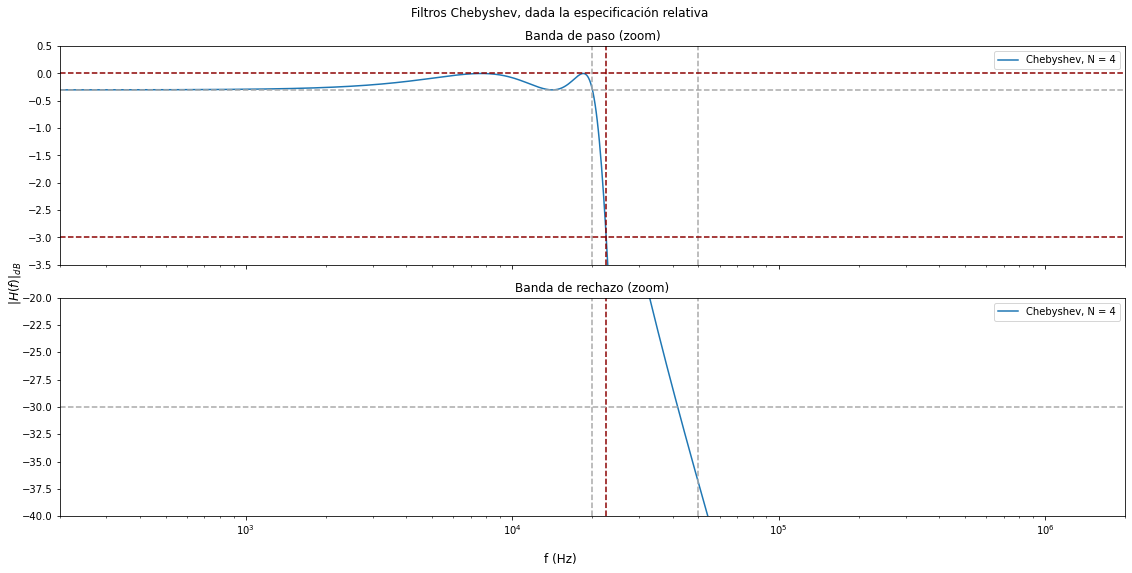

In [ ]:
# Grafica las respuestas en frecuencia
fig, ax = plt.subplots(2, 1, figsize=(16, 8), sharex=True)
# Respuestas en frecuencia (banda de paso)
ax[0].semilogx(f, HT, label=f'Chebyshev, N = {NT}')
# Marcas relevantes
for v, c in [(fp, 'darkgray'), (fr, 'darkgray'), (fcT, 'darkred')]:
    ax[0].axvline(v, linestyle='--', color=c)
for h, c in [(0, 'darkred'), (-Ap, 'darkgray'), (-Ar, 'darkgray'), (-3, 'darkred')]:
    ax[0].axhline(h, linestyle='--', color=c)
ax[0].axis([f[0], f[-1], min(-Ap, -3)-0.5, 0.5])
ax[0].set_title('Banda de paso (zoom)')
ax[0].legend()
# Respuestas en frecuencia (banda de rechazo)
ax[1].semilogx(f, HT, label=f'Chebyshev, N = {NT}')
# Marcas relevantes
for v in [fp, fr]:
    ax[1].axvline(v, linestyle='--', c='darkgray')
for v in [fcT]:
    ax[1].axvline(v, linestyle='--', c='darkred')
for h in [0, -Ap, -Ar, -3]:
    ax[1].axhline(h, linestyle='--', c='darkgray')
ax[1].axis([f[0], f[-1], -Ar-10, -Ar+10])
ax[1].set_title('Banda de rechazo (zoom)')
ax[1].legend()
fig.suptitle('Filtros Chebyshev, dada la especificación relativa')
fig.supxlabel('f (Hz)')
fig.supylabel(r'$\|H(f)\|_{dB}$')
fig.tight_layout();

In [ ]:
#Paso 2
# Calcula polos Chebyshev
k = np.arange(0, 2*NT)
a = (1/NT)*np.arcsinh(1/e)
pT = np.sin((2*k+1)*np.pi/(2*NT))*np.sinh(a)+1j*np.cos((2*k+1)*np.pi/(2*NT))*np.cosh(a)
pT = np.sort_complex(pT[pT.real<=0])
# Secciones Chebyshev - denominadores
AT = [np.real(np.poly(pT[i:i+2])) for i in range(NT%2, NT, 2)]
if NT%2:
    AT.append(np.array([1, -np.real(pT[0])]))
# Secciones Chebyshev
if NT%2:
    SOST = [(np.array([D[-1]]), D) for D in AT]
else:
    G = np.sqrt(1/(1+e**2))**(1/len(AT))
    SOST = [(G*np.array([D[-1]]), D) for D in AT]
# Muestra secciones
print('Secciones Chebyshev (B, A): ')
for sos in SOST:
    print(sos)

Secciones Chebyshev (B, A): 
(array([0.41942015]), array([1.        , 0.9782302 , 0.42672618]))
(array([1.11442047]), array([1.        , 0.40519622, 1.13383296]))


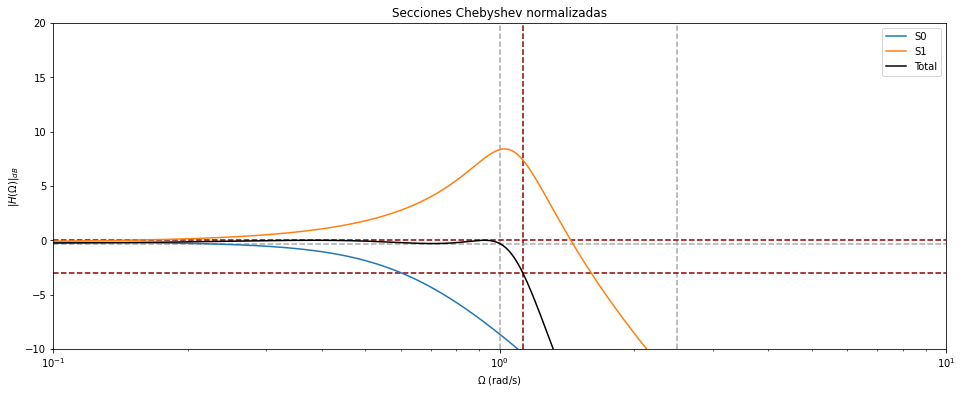

In [ ]:
# Grafica respuestas en frecuencia por sección
plt.figure(figsize=(16, 6))
W = np.linspace(0.1, 10, 10000)
Ht = np.ones_like(W)
# Marcas relevantes
for v, c in [(1, 'darkgray'), (fr/fp, 'darkgray'), (fcT/fp, 'darkred')]:
    plt.axvline(v, linestyle='--', color=c)
for h, c in [(0, 'darkred'), (-Ap, 'darkgray'), (-Ar, 'darkgray'), (-3, 'darkred')]:
    plt.axhline(h, linestyle='--', color=c)
# Secciones
for i, sos in enumerate(SOST):
    _, H = sps.freqs(sos[0], sos[1], W)
    Ht = Ht*H
    plt.semilogx(W, 20*np.log10(abs(H)), label=f'S{i}')
# Respuesta total
plt.semilogx(W, 20*np.log10(abs(Ht)), color='black', label='Total')
plt.axis([0.1, 10, -10, 20])
plt.xlabel('$\Omega$ (rad/s)')
plt.ylabel('$\|H(\Omega)\|_{dB}$')
plt.title('Secciones Chebyshev normalizadas')
plt.legend();

In [ ]:
#Paso 3
# Tranformación al pasa-bajas real (desnormalización)
def npb2pb(secciones, Wc):
    sk2 =[]
    for sk in secciones:
        b=sk[0]*Wc
        a=([sk[1][0],sk[1][1]*Wc,sk[1][2]*Wc**2])
        sk2.append([b,a])
    return sk2


    #return [(B*(Wc**(A.shape[0]-1)), A*np.array([Wc**i for i in range(A.shape[0])])) for

In [ ]:
# Polos Chebyshev estables, desnormalizados
pTd = 2*np.pi*fp*pT[pT.real <= 0]
# denominador de la función de transferencia
den = np.real(np.poly(pTd))
# Función de transferencia
HTs = ([den[-1]], den)

In [ ]:
# Respuestas en frecuencia

Wd, HTw = sps.freqresp(HTs, 2*np.pi*f)

<Figure size 720x432 with 0 Axes>

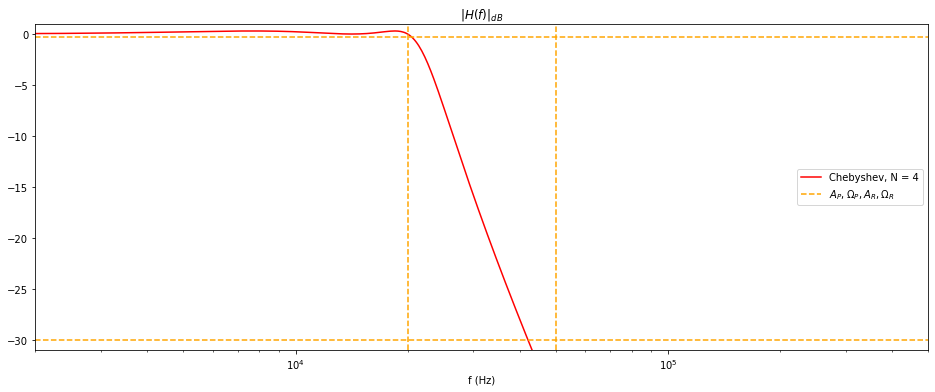

In [ ]:
# Gráficas de las respuestas en frecuencia
plt.figure(figsize=(10, 6))
plt.figure(figsize=(16, 6))
plt.semilogx(f, 20*np.log10(np.abs(HTw)), label='Chebyshev, N = {}'.format(NT), color='red')
plt.axvline(fp, ls='--', c='orange', label='$A_P, \\Omega_P, A_R, \\Omega_R$')
plt.axvline(fr, ls='--', c='orange')
plt.axhline(-Ap, ls='--', c='orange')
plt.axhline(-Ar, ls='--', c='orange')
plt.axis([0.1*fp, 10*fr, -Ar-1, 1])
plt.xlabel('f (Hz)'), plt.title('$|H(f)|_{dB}$')
plt.legend();

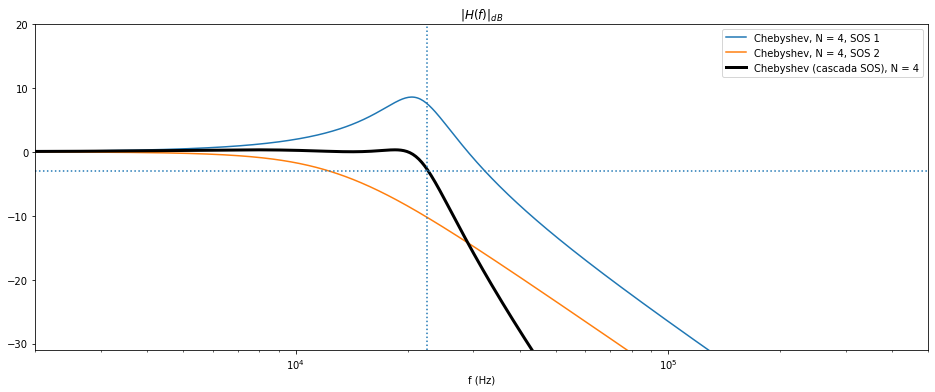

In [ ]:
# Secciones de primero y segundo orden, Chebyshev
sT = []
pTd = np.sort(pTd)[::-1]
for i in range(0, NT, 2):
    den = np.real(np.poly(pTd[i:i+2]))
    sT.append(([den[-1]],den))
if i+2 < NT:
    den = np.real(np.poly(pTd[i+1:i+2]))
    sT.append(([den[-1]],den))
# Gráficas de las respuestas en frecuencia
plt.figure(figsize=(16, 6))
HTf = np.ones_like(f)
for i, sos in enumerate(sT):
    Wd, HTw = sps.freqresp(sos, 2*np.pi*f)
    HTf = HTf*HTw
    plt.semilogx(f, 20*np.log10(np.abs(HTw)), label='Chebyshev, N = {}, SOS {}'.format(NT, i+1))
plt.semilogx(f, 20*np.log10(np.abs(HTf)), label='Chebyshev (cascada SOS), N = {}'.format(NT), lw=3, color='k')
plt.axis([0.1*fp, 10*fr, -Ar-1, 20])
plt.xlabel('f (Hz)'), plt.title('$|H(f)|_{dB}$')
plt.axvline(fcT, ls=':')
plt.axhline(-3, ls=':')
plt.legend();

## Problema 4

In [ ]:
##Procesamos la señal de AM rectificada usando nuestro filtro y la función scipy.signal.lsim(), que
#simula sistemas continuos dados los coeficientes de la función de transferencia y la frecuencia de muestreo de la simulación.
#Graficamos tanto la señal de salida como su espectro

tout,Filtro, xout = lsim(([den[-1]],den),U=am_rectificada,T=t)

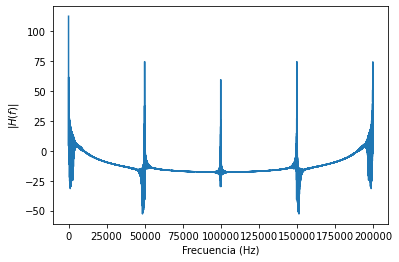

In [ ]:
###Obtenemos la Transformada de Fourier y graficamos el nuevo espectro en frecuencia
FFTFilt = np.fft.fft(Filtro)
LongFiltro = len(FFTFilt)
ubFiltro = np.arange(0,l)*((400000/2)/LongFiltro)
plt.plot(ubFiltro, 20*np.log10(np.abs(FFTFilt)))
plt.xlabel ('Frecuencia (Hz)')
plt.ylabel ('$|H(f)|$')
plt.title ('');

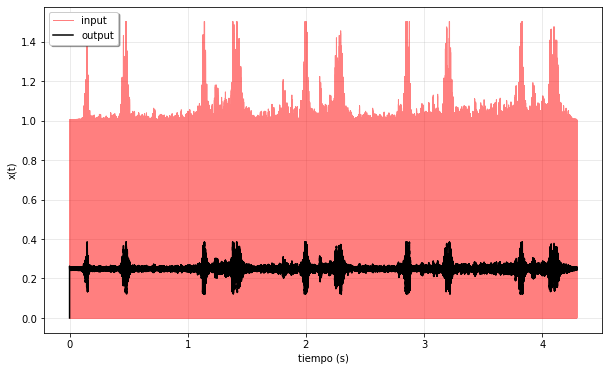

In [ ]:

plt.figure(figsize=(10, 6))
plt.plot(t, am_rectificada, 'r', alpha=0.5, linewidth=1, label='input')
plt.plot(tout, Filtro, 'k', linewidth=1.5, label='output')
plt.legend(loc='best', shadow=True, framealpha=1)
plt.grid(alpha=0.3)
plt.xlabel ('tiempo (s)')
plt.ylabel ('x(t)')
plt.title ('')
plt.show();

In [ ]:
#Reproducimos el audio
Audio = ipd.Audio(Filtro, rate=700000, autoplay=False)
Audio

## Problema 5

## Topología Deliyannis - Friend

$$H(s) = -\frac{Y_1Y_3}{{Y_3Y_4+(Y_1+Y_2+Y_3+Y_4})Y_5} = -\frac{G_1G_3}{{G_3G_4+(G_1+sC_2+G_3+G_4})sC_5}$$

$$= -\frac{G_1G_3}{s^2(C_2C_5)+G_1C_5s+G_3C_5s+G_4C_5s+G_3G_4} = -\frac{G_1G_3}{s^2C_2C_5+(G_1+G_3+G_4)C_5s+G_3G_4}$$

Dividiendo entre $C_2C_5$

$$H(s) = -\frac{\frac{G_1G_3}{C_2C_5}}{s^2+\frac{(G_1+G_3+G_4)s}{C_2}+\frac{G_3G_4}{C_2C_5}}$$

Para simplificar proponemos $G_1=G_3=G_4=G$

$$H(s) = -\frac{\frac{G^2}{C_2C_5}}{s^2+\frac{(3G)s}{C_2}+\frac{G^2}{C_2C_5}}$$

Sustituyendo $G=\frac{1}{R}$

$$H(s) = -\frac{\frac{1}{R^2C_2C_5}}{s^2+\frac{3s}{RC_2}+\frac{1}{R^2C_2C_5}}$$

Hacemos que:

$$b_0 = a_0 = \frac{1}{R^2C_2C_5}$$

$$R^2 = \frac{1}{a_0C_2C_5} = \sqrt\frac{1}{a_0C_2C_5}$$

$$a_1 = \frac{3}{RC_2}$$
$$C_2 = \frac{3}{Ra_1}$$
$$C_5 = \frac{1}{R^2a_0C_2}$$


## Topología Tow - Thomas

$$H(s) = \frac{\frac{1}{C^2R_{F1}R_{F2}}}{s^2+\frac{3}{2CR_{F1}}+\frac{1}{C^2R_{F1}R_{F2}}}$$

Si proponemos que: $$b_0 = a_0 = \frac{1}{C^2R_{F1}R_{F2}}$$

$$C^2 = \frac{1}{a_0R_{F1}R_{F2}}$$

$$C = \sqrt\frac{1}{a_0R_{F1}R_{F2}}$$

$$a_1 = \frac{3}{2CR_{F1}}$$

$$R_{F1} = \frac{3}{2a_1C}$$

$$R_{F2}= \frac{1}{a_0R_{F1}C^2}$$

In [ ]:
def secciones_componentes(s, R=820,C=1e-9):
    sk=[]

    for i,[bi,ai] in enumerate (s):
        C2=3/(ai[1]*R)
        C5=1/(ai[2]*C2*R**2)
        sk.append([R, C2,R,R,C5])

    st=[]
    for i,[bi,ai] in enumerate (s):

        Rf1= 3/(2*C*ai[1])
        Rf2= 1/(Rf1*ai[2]*C**2)
        st.append([Rf1/1e3, Rf2/1e3])
    return sk,st

In [ ]:
sk,st=secciones_componentes(sT)
print(f'Componentes para la seccciones con Deliyannis-Friend')
print(f' R1     C2    R3       R4     C5 ')
for s in sk:
    print(s)
print(f'Componentes para secciones con Tow-Thomas')
print(f' RF1       RF2 ')
for s in st:
    print(s)

Componentes para la seccciones con Deliyannis-Friend
 R1     C2    R3       R4     C5 
[820, 7.185089105709835e-08, 820, 820, 1.1560359232929164e-09]
[820, 2.9761613544441886e-08, 820, 820, 7.415608670776963e-09]
Componentes para secciones con Tow-Thomas
 RF1       RF2 
[29.458865333410323, 1.8958989142003821]
[12.202261553221174, 12.161598220074218]


#### Netlist del circuito para la simulación en Partsim
practica2ejercicio5 Simulation

VIPROBE00101 0 NN00101 DC 0

VIPROBE00102 Vp1 NN00102 DC 0

XU1 NN00101 VP1 NN00102 VOUT0 V LMX321

V1 Vin 0 AC ( 1 )

XU2 VN2 VP2 VP2 VOUT2 VN2 AMP_UAF

R4 VA Vin 820

C1 VOUT0 Vp1 2.97uf

R1 Vp1 VA 820

C2 0 VA 7.41uf

R5 VOUT0 VA 820

R3 VP2 VOUT0 50K

R6 VN2 0 50K

R7 VP2 VOUT2 50K

R8 VN2 VOUT3 50K

R9 VOUT2 VP3 12.20K

XU3 0 VP3 VP3 VOUT3 VN3 AMP_UAF

R12 VP2 VOUT_4 50K

C3 VOUT3 VP3 1000pf

R10 VOUT3 VP4 12.16K


 XU4 0 VP4 VP4 VOUT_4 VN4 AMP_UAF

C4 VOUT_4 VP4 1000pf

V13  VN4 15

V15  V 15

V2 Net1112 VP1 15

V3 Net1115 VP2 15

V4 VN2 Net1115 15

V5 VN3  15

V6 0 VP3 15

V7 0 VP4 15

.options rshunt = 1.0e12 KEEPOPINFO

** modelimport:LMX321

* UAF42 OPERATIONAL AMPLIFIER "MACROMODEL" SUBCIRCUIT

In [ ]:
#SPICE
!pip install --upgrade xlrd

datos=pd.read_excel('practica2ejercicio5.xlsx')

In [ ]:
#EXPERIMENTAL
datos=pd.read_excel('practica2ejercicio5.xlsx')

datos
f_exp1=datos.iloc[1:,0]
H_exp1=datos.iloc[1:,2]

In [ ]:
#SPICE
datos1=pd.read_excel('Ejercicio5-Spice.xls')

datos1
f_SPICE=datos1.iloc[1:,0]
H_SPICE=datos1.iloc[1:,2]

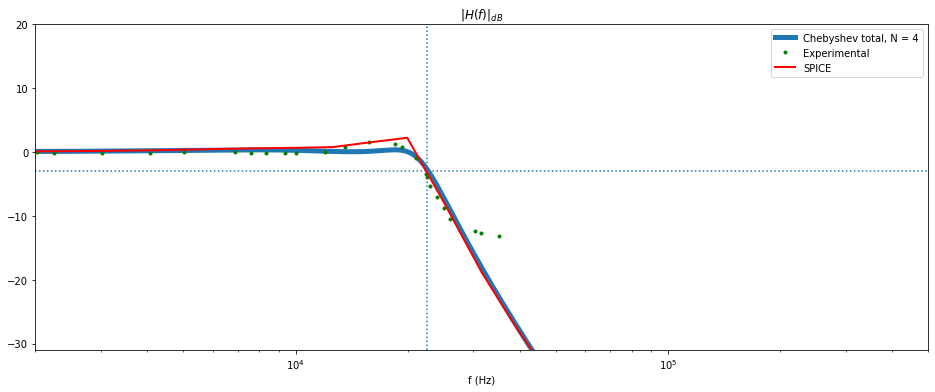

In [ ]:
# Prepara gráfica con referencias relevantes
plt.figure(figsize=(16, 6))
plt.semilogx(f, 20*np.log10(np.abs(HTf)), label='Chebyshev total, N = {}'.format(NT), lw=5)
plt.axis([0.1*fp, 10*fr, -Ar-1, 20])
plt.xlabel('f (Hz)'), plt.title('$|H(f)|_{dB}$')
plt.axvline(fcT, ls=':')
plt.axhline(-3, ls=':')

plt.semilogx(f_exp1,H_exp1,linestyle='',marker='.', linewidth=10,label='Experimental',color='green')
plt.semilogx(f_SPICE,H_SPICE,linestyle='-', linewidth=2,label='SPICE',color='red')
plt.legend();

## Comentarios
La transformada de fourier de la demodulacion ayuda a observar la morfologia de su espectro de frecuencia.
Los filtros chevyshev sirven para atenuar los filtros ,de forma normalizada ,vemos que se atenuan mucho mas rapido que los butterworth
pero en su forma desnormalizada la diferencia es que presentan unas oscilaciones antes de su frecuencia de corte.

De igual manera gracias a la resolucion del ejercicio 4
pudimos darnos cuenta que los filtros sirven para apreciar los sonidos con base
en la transformada de Fourier en donde escuchamos los latidos del corazon .
Al implementar el ejercicio 5 con el operacional y el UAF42 creamos un filtro donde pudimos darnos cuenta
que no fue exactamente exacto pero se aproximaba.